In [ ]:
%%capture


In [41]:
%%capture
# Importing required libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

In [2]:
SDGData = pd.read_csv('https://raw.githubusercontent.com/pruthvireddy/SDGGoals_ACausalStudy/main/Data/Processed/GlobalData.csv')
SDGDataUn = pd.read_csv('https://raw.githubusercontent.com/pruthvireddy/SDGGoals_ACausalStudy/main/Data/Processed/ModelData.csv')

In [46]:
SDGData.head()

,metric_key,year,economic_category,GDP,GDP_15,GDP_PC,GDP_PC_PPP,GDP_PC_PPP_17,GDP_PEMP,GDP_PPP,MFG_VA,ELC_POP,ELC_RUR_POP,CO2GDP,AtmCO2
0,developed-2000,2000,Developed,8.159867e+11,1.036680e+12,27748.42,21889.46,33294.94,76780.53,8.407390e+11,16.03,100.0,100.0,0.280833,0.535944
1,developed-2001,2001,Developed,7.833653e+11,1.054067e+12,28201.18,22883.42,33940.95,78184.48,8.784286e+11,15.76,100.0,100.0,0.278944,0.492278
2,developed-2002,2002,Developed,8.153283e+11,1.066910e+12,28634.53,23919.38,34549.04,79313.37,9.144412e+11,15.37,100.0,100.0,0.271167,0.464611
3,developed-2003,2003,Developed,9.523626e+11,1.083325e+12,29056.41,24698.18,35153.29,80366.24,9.427193e+11,15.05,100.0,100.0,0.270889,0.441833
4,developed-2004,2004,Developed,1.084243e+12,1.110886e+12,29864.99,26101.88,36219.06,82640.68,9.914834e+11,14.98,100.0,100.0,0.259389,0.410222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


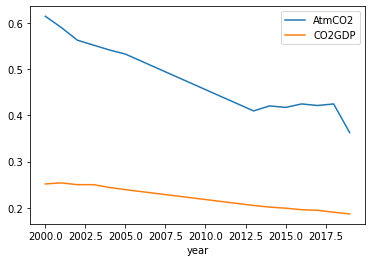

In [7]:
SDGDataUn.groupby('year')['AtmCO2','CO2GDP'].mean().plot();

In [ ]:
SDGDataUn.groupby('year')['AtmCO2','CO2GDP'].mean().plot();

# Difference-in Difference on GDP_PC_PPP

In [23]:
GDPPCGP = SDGData[SDGData['economic_category'] != 'Others']
GDPPCGP = GDPPCGP[['year','economic_category', 'GDP_PC_PPP']].set_index(['year','economic_category']).unstack('economic_category').dropna()
GDPPCGP['paris_climate_accord'] = 0
GDPPCGP['paris_climate_accord'] = GDPPCGP.paris_climate_accord.where(GDPPCGP.index>2015,1)

In [24]:
group_mean_check = GDPPCGP.groupby('paris_climate_accord').mean()
group_mean_check

GDP_PC_PPP              
economic_category        Developed    Developing
paris_climate_accord                            
0                     42132.297500  16719.262500
1                     28723.466667  13329.887778

In [33]:
GDPPCMod = SDGData.loc[SDGData['economic_category'] != 'Others', ['year','economic_category', 'GDP_PC_PPP']].dropna()
GDPPCMod['paris_climate_accord'] = 0
GDPPCMod['paris_climate_accord'] = GDPPCMod.paris_climate_accord.where(GDPPCMod.year>2015,1)

conditions = [
    (GDPPCMod['economic_category'] == 'Developed')]

choices = [0]
GDPPCMod['economic_category'] = np.select(conditions, choices, default=1)

In [45]:
model = 'GDP_PC_PPP ~ year + economic_category + paris_climate_accord + economic_category * paris_climate_accord'

GDPPC_Model = smf.ols(formula=model, data=GDPPCMod)
GDPPC_Mod_result = GDPPC_Model.fit()


print(GDPPC_Mod_result.summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_PC_PPP   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     259.0
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.53e-17
Time:                        18:34:36   Log-Likelihood:                -228.06
No. Observations:                  26   AIC:                             466.1
Df Residuals:                      21   BIC:                             472.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# Difference-in Difference on CO2GDP

In [51]:
CO2GDP_Mod = SDGData[SDGData['economic_category'] != 'Others']
CO2GDP_Mod = CO2GDP_Mod[['year','economic_category', 'CO2GDP']].set_index(['year','economic_category']).unstack('economic_category').dropna()
CO2GDP_Mod['paris_climate_accord'] = 0
CO2GDP_Mod['paris_climate_accord'] = CO2GDP_Mod.paris_climate_accord.where(CO2GDP_Mod.index>2015,1)

In [52]:
group_mean_check = CO2GDP_Mod.groupby('paris_climate_accord').mean()
group_mean_check

CO2GDP           
economic_category    Developed Developing
paris_climate_accord                     
0                     0.176764   0.213342
1                     0.233740   0.234135

In [55]:
CO2GDP_Mod = SDGData.loc[SDGData['economic_category'] != 'Others', ['year','economic_category', 'CO2GDP']].dropna()
CO2GDP_Mod['paris_climate_accord'] = 0
CO2GDP_Mod['paris_climate_accord'] = CO2GDP_Mod.paris_climate_accord.where(GDPPCMod.year>2015,1)

conditions = [
    (CO2GDP_Mod['economic_category'] == 'Developed')]

choices = [0]
CO2GDP_Mod['economic_category'] = np.select(conditions, choices, default=1)

In [58]:
model = 'CO2GDP ~ year + economic_category + paris_climate_accord + economic_category * paris_climate_accord'

CO2GDP_Model = smf.ols(formula=model, data=CO2GDP_Mod)
CO2GDP_Mod_reults = CO2GDP_Model.fit()


print(CO2GDP_Mod_reults.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO2GDP   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 09 May 2022   Prob (F-statistic):           4.36e-16
Time:                        18:52:43   Log-Likelihood:                 130.70
No. Observations:                  40   AIC:                            -251.4
Df Residuals:                      35   BIC:                            -242.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# Difference-in Difference on AtmCO2

In [59]:
AtmCO2_Mod = SDGData[SDGData['economic_category'] != 'Others']
AtmCO2_Mod = AtmCO2_Mod[['year','economic_category', 'AtmCO2']].set_index(['year','economic_category']).unstack('economic_category').dropna()
AtmCO2_Mod['paris_climate_accord'] = 0
AtmCO2_Mod['paris_climate_accord'] = AtmCO2_Mod.paris_climate_accord.where(AtmCO2_Mod.index>2015,1)

In [60]:
group_mean_check = AtmCO2_Mod.groupby('paris_climate_accord').mean()
group_mean_check

AtmCO2           
economic_category    Developed Developing
paris_climate_accord                     
0                     0.239847   0.544637
1                     0.355847   0.597119

In [61]:
AtmCO2_Mod = SDGData.loc[SDGData['economic_category'] != 'Others', ['year','economic_category', 'AtmCO2']].dropna()
AtmCO2_Mod['paris_climate_accord'] = 0
AtmCO2_Mod['paris_climate_accord'] = AtmCO2_Mod.paris_climate_accord.where(GDPPCMod.year>2015,1)

conditions = [
    (AtmCO2_Mod['economic_category'] == 'Developed')]

choices = [0]
AtmCO2_Mod['economic_category'] = np.select(conditions, choices, default=1)

In [63]:
model = 'AtmCO2 ~ year + economic_category + paris_climate_accord + economic_category * paris_climate_accord'

AtmCO2_Model = smf.ols(formula=model, data=AtmCO2_Mod)
AtmCO2_Mod_results = AtmCO2_Model.fit()


print(AtmCO2_Mod_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AtmCO2   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     372.3
Date:                Mon, 09 May 2022   Prob (F-statistic):           3.76e-28
Time:                        18:57:23   Log-Likelihood:                 94.947
No. Observations:                  40   AIC:                            -179.9
Df Residuals:                      35   BIC:                            -171.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [64]:
print(AtmCO2_Mod_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                            &      AtmCO2      & \textbf{  R-squared:         } &     0.977   \\
\textbf{Model:}                                    &       OLS        & \textbf{  Adj. R-squared:    } &     0.974   \\
\textbf{Method:}                                   &  Least Squares   & \textbf{  F-statistic:       } &     372.3   \\
\textbf{Date:}                                     & Mon, 09 May 2022 & \textbf{  Prob (F-statistic):} &  3.76e-28   \\
\textbf{Time:}                                     &     19:00:16     & \textbf{  Log-Likelihood:    } &    94.947   \\
\textbf{No. Observations:}                         &          40      & \textbf{  AIC:               } &    -179.9   \\
\textbf{Df Residuals:}                             &          35      & \textbf{  BIC:               } &    -171.4   \\
\textbf{Df Model:}                                 &           4      & \textbf{                     } &          